In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
digits=load_digits()
X=digits.data
Y=digits.target

In [3]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


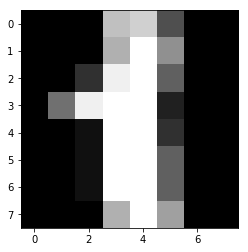

1


In [4]:
plt.imshow(X[1].reshape(8,8),cmap='gray')
plt.show()
print(Y[1])

In [5]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
mnb=MultinomialNB()

In [7]:
mnb.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
mnb.predict(X)

array([0, 1, 1, ..., 8, 9, 8])

In [9]:
mnb.score(X,Y)

0.9053978853644964

In [10]:
t=cross_val_score(mnb,X,Y,cv=5,scoring='accuracy')

In [11]:
np.mean(t)

0.8714703025475334

In [12]:
t.mean()

0.8714703025475334

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
ypred=mnb.predict(X)
cf_matrix=confusion_matrix(Y,ypred)

In [15]:
cf_matrix

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

In [16]:
ypred.shape

(1797,)

In [17]:
from  sklearn.metrics import classification_report

In [18]:
print(classification_report(Y,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

   micro avg       0.91      0.91      0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [19]:
classification_report?

In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


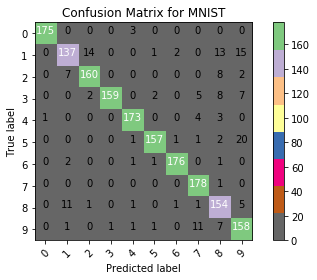

In [21]:
plot_confusion_matrix(cf_matrix,classes=np.arange(10),normalize=False,title="Confusion Matrix for MNIST",cmap=plt.cm.Accent_r)

In [67]:
x=[
    "This was an awesome movie",
    "Great movie! I liked it a lot!",
    "Happy ending! awesome scting by the hero",
    "loved it! truly great",
    "bad not upto the mark",
    " could have been better",
    "Surely a disappointing movie"
]
y=[1,1,1,1,0,0,0]

In [54]:
x_test=["I was happy & happy and I loved the acting in the movie", "The movie I saw was bad","I was disappointed with it"]

In [24]:
sample_text="""I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far..<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.
First things first, Edison Chen did a fantastic, believable job as a Cambodian hit-man, born and bred in the dumps and a gladiatorial ring, where he honed his craft of savage battery in order to survive, living on the mantra of kill or be killed. In a role that had little dialogue, or at least a few lines in Cambodian/Thai, his performance is compelling, probably what should have been in the Jet Li vehicle Danny the Dog, where a man is bred for the sole purpose of fighting, and on someone else's leash.<br /><br />Like Danny the Dog, the much talked about bare knuckle fight sequences are not choreographed stylistically, but rather designed as normal, brutal fisticuffs, where everything goes. """

In [25]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [26]:
tokenizer=RegexpTokenizer('[a-zA-Z]+')
stopwords=set(stopwords.words('english'))

In [27]:
clean_text=sample_text.replace("<br><\br>"," ")

In [28]:
print(clean_text)

I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far..<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.
First things first, Edison Chen did a fantastic, believable job as a Cambodian hit-man, born and bred in the dumps and a gladiatorial ring, where he honed his craft of savage battery in order to survive, living on the mantra of kill or be killed. In a role that had little dialogue, or at least a few lines in Cambodian/Thai, his performance is compelling, probably what should have been in the Jet Li vehicle Danny the Dog, where a man is bred for the sole purpose of fighting, and on someone else's leash.<br /><br />Like Danny the Dog, the much talked about bare knuckle fight sequences are not choreographed stylistically, but rather designed as normal, brutal fisticuffs, where everything

In [29]:
tokenizer.tokenize(sample_text)

['I',
 'loved',
 'this',
 'movie',
 'since',
 'I',
 'was',
 'and',
 'I',
 'saw',
 'it',
 'on',
 'the',
 'opening',
 'day',
 'It',
 'was',
 'so',
 'touching',
 'and',
 'beautiful',
 'I',
 'strongly',
 'recommend',
 'seeing',
 'for',
 'all',
 'It',
 's',
 'a',
 'movie',
 'to',
 'watch',
 'with',
 'your',
 'family',
 'by',
 'far',
 'br',
 'br',
 'My',
 'MPAA',
 'rating',
 'PG',
 'for',
 'thematic',
 'elements',
 'prolonged',
 'scenes',
 'of',
 'disastor',
 'nudity',
 'sexuality',
 'and',
 'some',
 'language',
 'First',
 'things',
 'first',
 'Edison',
 'Chen',
 'did',
 'a',
 'fantastic',
 'believable',
 'job',
 'as',
 'a',
 'Cambodian',
 'hit',
 'man',
 'born',
 'and',
 'bred',
 'in',
 'the',
 'dumps',
 'and',
 'a',
 'gladiatorial',
 'ring',
 'where',
 'he',
 'honed',
 'his',
 'craft',
 'of',
 'savage',
 'battery',
 'in',
 'order',
 'to',
 'survive',
 'living',
 'on',
 'the',
 'mantra',
 'of',
 'kill',
 'or',
 'be',
 'killed',
 'In',
 'a',
 'role',
 'that',
 'had',
 'little',
 'dialogue',


In [30]:
ps=PorterStemmer()

In [31]:
def clean_review(review):
    review=review.lower()
    review=review.replace("<br><\br>"," ")
    tokens= tokenizer.tokenize(review)
    new_tokens=[ps.stem(token) for token in tokens if token not in stopwords]
    
    return " ".join(new_tokens)

In [32]:
clean_review(sample_text)

'love movi sinc saw open day touch beauti strongli recommend see movi watch famili far br br mpaa rate pg themat element prolong scene disastor nuditi sexual languag first thing first edison chen fantast believ job cambodian hit man born bred dump gladiatori ring hone craft savag batteri order surviv live mantra kill kill role littl dialogu least line cambodian thai perform compel probabl jet li vehicl danni dog man bred sole purpos fight someon els leash br br like danni dog much talk bare knuckl fight sequenc choreograph stylist rather design normal brutal fisticuff everyth goe'

In [55]:
x_cleaned=[clean_review(sent) for sent in x ]
x_test_cleaned=[clean_review(sent) for sent in x_test ]

In [56]:
print(x_cleaned)

['awesom movi', 'great movi like lot', 'happi end awesom scting hero', 'love truli great', 'bad upto mark', 'could better', 'sure disappoint movi']


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv=CountVectorizer(ngram_range=(1,1))

In [59]:
x_vect=cv.fit_transform(x_cleaned).toarray()

In [60]:
x_vect

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]],
      dtype=int64)

In [61]:
x_vect_test=cv.transform(x_test_cleaned).toarray()

In [62]:
x_vect_test

array([[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [63]:
cv.vocabulary_

{'awesom': 0,
 'movi': 13,
 'great': 6,
 'like': 9,
 'lot': 10,
 'happi': 7,
 'end': 5,
 'scting': 14,
 'hero': 8,
 'love': 11,
 'truli': 16,
 'bad': 1,
 'upto': 17,
 'mark': 12,
 'could': 3,
 'better': 2,
 'sure': 15,
 'disappoint': 4}

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
mnb=MultinomialNB()

In [68]:
mnb.fit(x_vect,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
mnb.predict(x_vect_test)

array([1, 0, 0])

In [46]:
import pandas as pd

In [47]:
c= open(r".\IMDB\imdb_trainX.txt","r",encoding="utf8")

In [48]:
ct=c.readlines()

In [49]:
print(ct[1])

First things first, Edison Chen did a fantastic, believable job as a Cambodian hit-man, born and bred in the dumps and a gladiatorial ring, where he honed his craft of savage battery in order to survive, living on the mantra of kill or be killed. In a role that had little dialogue, or at least a few lines in Cambodian/Thai, his performance is compelling, probably what should have been in the Jet Li vehicle Danny the Dog, where a man is bred for the sole purpose of fighting, and on someone else's leash.<br /><br />Like Danny the Dog, the much talked about bare knuckle fight sequences are not choreographed stylistically, but rather designed as normal, brutal fisticuffs, where everything goes. This probably brought a sense of realism and grit when you see the characters slug it out at each other's throats, in defending their own lives while taking it away from others. It's a grim, gritty and dark movie both literally and figuratively, and this sets it apart from the usual run off the mill

In [50]:
y=open(r".\IMDB\imdb_trainY.txt","r",encoding="utf8")
y=y.readlines()

In [51]:
clean=[clean_review(x) for x in ct]